In [33]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions,preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt


### Loading Pretrained Model

In [34]:
model=InceptionV3(weights="imagenet")
# model.summary()

In [35]:
def predict_image(model,image_path):
    img=load_img(image_path,target_size=(299,299))
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)
    predictions=model.predict(img_array)
    decoded_predictions_=decode_predictions(predictions,top=5)
    return decoded_predictions_[0]

### Visualization Result

2026-02-10 19:39:41.743463: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f4e940028f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-10 19:39:41.743478: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-10 19:39:41.797690: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-10 19:39:42.265652: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predictions
1:giant_panda (score0.94)
2:space_shuttle (score0.00)
3:lesser_panda (score0.00)
4:soccer_ball (score0.00)
5:white_stork (score0.00)


I0000 00:00:1770730786.038537   38899 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


(np.float64(-0.5), np.float64(298.5), np.float64(298.5), np.float64(-0.5))

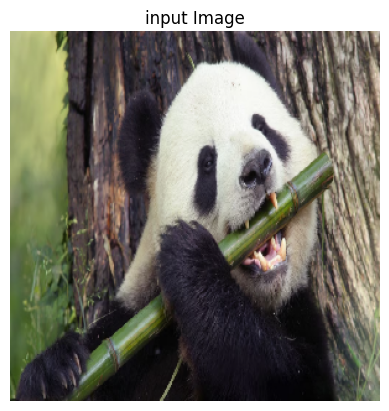

In [36]:
sample_image_path='/home/workstation-p/Downloads/Projects/NLP-MLOPS/Computer_Vision/Open_CV/Images/Pandas.png'

predictions=predict_image(model,sample_image_path)

print("Predictions")
for i,(imagenet_id,label,score) in enumerate(predictions):
    print(f"{i+1}:{label} (score{score:.2f})")

img=load_img(sample_image_path,target_size=(299,299))
plt.imshow(img)
plt.title("input Image")
plt.axis("off")    